In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import quad
from optims.SBS_particles import SBS_particles
from optims.extended_function import extended_function

np.random.seed(42)

In [2]:
class Fun:
  def __init__(self) -> None:
        super().__init__()
        self.n = 0

  def __call__(self, x: np.ndarray) -> float:
      self.n += 1
      return (np.cos(x**2) + x/5 + 1).sum()

In [3]:
def create_sim(k=3, sigma=-1, save_fig=None):

  bounds = np.array([(0, 5)])

  optim = SBS_particles(
    bounds,
    500,
    k_iter=[k],
    svgd_iter=1000,
    lr=0.1,
    adam=False,
    sigma=sigma,
    distance_q=0,
    value_q=0
  )

  F = Fun()
  F_ext = extended_function(F, bounds)
  _best, xs, _fs = optim.optimize(F_ext)

  # paths = np.array(optim.paths)

  # plt.style.use("seaborn-v0_8")

  plt.hist(xs.flatten(), density=True, bins=50, label="SBS histogram")

  """ colors = cm.rainbow(np.linspace(0, 1, paths.shape[1]))
  for i in range(paths.shape[0]):
    for j in range(paths.shape[1]):
      plt.scatter(paths[i][j], Fun()(paths[i][j]), color=colors[j]) """

  integral = quad(lambda x : np.exp(-k*F(np.array([ x ]).reshape(1, -1))), bounds[0, 0], bounds[0, 1])[0]
  m_k = lambda x : np.exp(-k*F(x)) / integral

  x = np.linspace(bounds[0, 0], bounds[0, 1], 500)
  plt.plot(x, [F(np.array([x_i])) for x_i in x], label="$f$")
  plt.plot(x, [m_k(np.array([x_i])) for x_i in x], label="$m^{(\kappa)}$")

  plt.xlim(bounds[0, 0], bounds[0, 1])
  plt.legend()
  plt.title(f"$\kappa = {k} \;\; \sigma = {sigma}$")
  plt.grid(ls="--")

  if save_fig != None:
    plt.savefig(save_fig, dpi=300, bbox_inches="tight")

  plt.show()


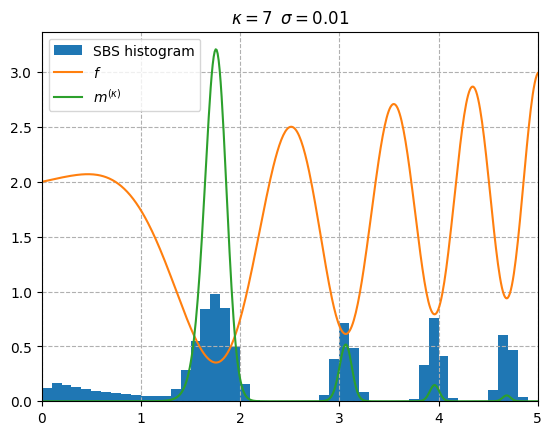

In [11]:
create_sim(k=7, sigma=0.01)

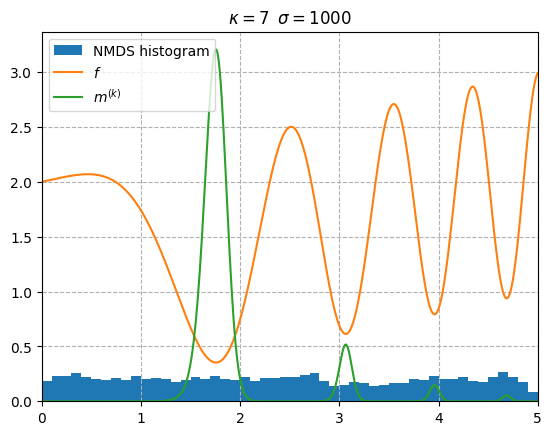

In [ ]:
# no clipping
create_sim(k=7, sigma=1000)

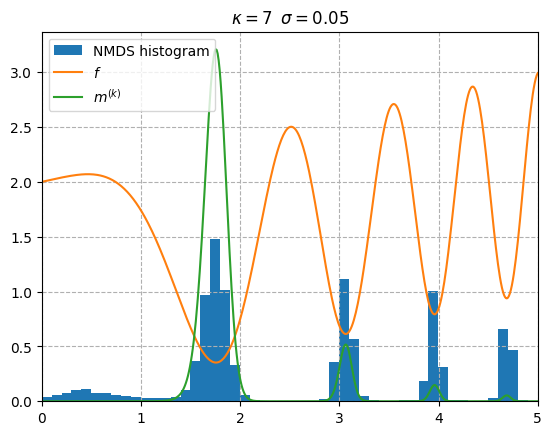

In [7]:
create_sim(k=7, sigma=1e-15)